In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import os
from functools import reduce

In [2]:
path_to_site_summary = 'Northern_Sites.csv'

In [3]:
site_summary=pd.read_csv(path_to_site_summary)

In [4]:
site_summary['color'] = ''
site_summary.loc[site_summary['Type'] == 'WB', 'color'] = '#819cc7'
site_summary.loc[site_summary['Type'] == 'WX', 'color'] = '#a1c781'

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'TKL 873'),
  Text(1, 0, 'TKL 524'),
  Text(2, 0, 'RCBP2.1'),
  Text(3, 0, 'WCBP1.2'),
  Text(4, 0, 'ERBP1 Pond1'),
  Text(5, 0, 'Kelly'),
  Text(6, 0, 'Asik'),
  Text(7, 0, 'Red Dog'),
  Text(8, 0, 'Noatak Lake'),
  Text(9, 0, 'Noatak Airport'),
  Text(10, 0, 'Tahinichok')])

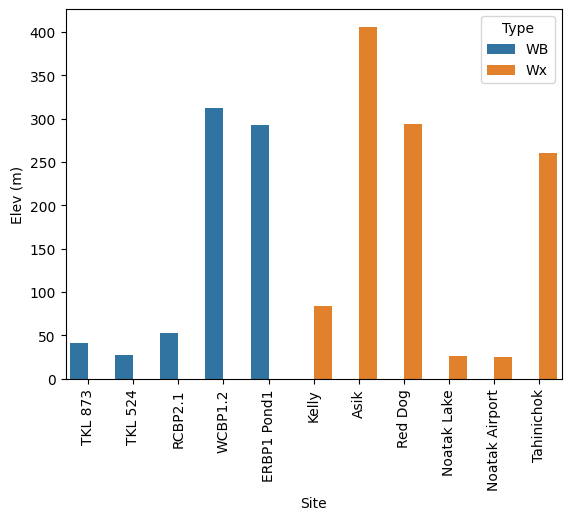

In [5]:
sns.barplot(data=site_summary, x='Site', y='Elev (m)', hue='Type')
plt.xticks(rotation=90)

In [6]:
def get_minmax_date(original_dataframe, time_index='time'):
    
    minmax = pd.DataFrame(index=[0, 1])
    # Iterate over columns in the original dataframe
    for column in original_dataframe.columns:
        # Skip the datetime column
        if column == time_index:
            continue
        
        # Find the minimum and maximum datetime values where the column value is not nan
        min_datetime = original_dataframe.loc[original_dataframe[column].notna(), time_index].min()
        max_datetime = original_dataframe.loc[original_dataframe[column].notna(), time_index].max()
        
        # Assign the values to the new dataframe
        minmax.loc[0, column] = min_datetime
        minmax.loc[1, column] = max_datetime
    
    # Print or use the new dataframe
    return minmax

## Common column names
time

relative_humidity

precipitation

shortwave_in

snow_depth

snow_depth_qa

wind_speed

wind_speed_qa

wind_direction

dew_point_temperature

snow_water_equivalent

air_temperature

air_temperature_qa

air_pressure

In [7]:
Asik = pd.read_csv('Asik/Asik.csv')
Asik_units = Asik.iloc[0]
Asik = Asik.iloc[1:]
Asik.columns = ['time', 'relative_humidity', 'precipitation', 'shortwave_in', 'snow_depth', 'snow_depth_qa', 'wind_speed', 'wind_speed_qa', 'wind_direction']
Asik_minmax = get_minmax_date(Asik)
print(Asik_minmax)
#Asik_minmax['type'] = ['min', 'max']
Asik_minmax  = Asik_minmax.T.reset_index()
print(Asik_minmax)
Asik_minmax.columns = ['var', 'min', 'max']
Asik_minmax['min'] = pd.to_datetime(Asik_minmax['min'])
Asik_minmax['max'] = pd.to_datetime(Asik_minmax['max'])
Asik_minmax['var'] = Asik_minmax['var'].astype(str)
Asik_minmax['site'] = 'Asik'

      relative_humidity         precipitation          shortwave_in  \
0  2015-05-05T14:00:00Z  2015-05-05T14:00:00Z  2015-05-05T14:00:00Z   
1  2017-06-05T19:00:00Z  2017-06-05T19:00:00Z  2017-06-05T19:00:00Z   

             snow_depth         snow_depth_qa            wind_speed  \
0  2015-05-08T12:00:00Z  2015-05-05T14:00:00Z  2015-05-05T14:00:00Z   
1  2017-06-05T19:00:00Z  2017-06-05T19:00:00Z  2017-06-05T19:00:00Z   

          wind_speed_qa        wind_direction  
0  2015-05-05T14:00:00Z  2015-05-05T14:00:00Z  
1  2017-06-05T19:00:00Z  2017-06-05T19:00:00Z  
               index                     0                     1
0  relative_humidity  2015-05-05T14:00:00Z  2017-06-05T19:00:00Z
1      precipitation  2015-05-05T14:00:00Z  2017-06-05T19:00:00Z
2       shortwave_in  2015-05-05T14:00:00Z  2017-06-05T19:00:00Z
3         snow_depth  2015-05-08T12:00:00Z  2017-06-05T19:00:00Z
4      snow_depth_qa  2015-05-05T14:00:00Z  2017-06-05T19:00:00Z
5         wind_speed  2015-05-05T14:00

In [17]:
Kelly_RAWS = pd.read_csv('Kelly/Kelly_RAWS.csv')
Kelly_RAWS_units = Asik.iloc[0]
Kelly_RAWS = Kelly_RAWS.iloc[1:]
Kelly_RAWS.columns = ['time', 'dew_point_temperature', 'relative_humidity', 'precipitation', 'shortwave_in', 'air_temperature', 'wind_speed', 'wind_direction']
Kelly_RAWS_minmax = get_minmax_date(Kelly_RAWS)

#Kelly_RAWS_minmax['type'] = ['min', 'max']
Kelly_RAWS_minmax  = Kelly_RAWS_minmax.T.reset_index()
Kelly_RAWS_minmax.columns = ['var', 'min', 'max']
Kelly_RAWS_minmax['min'] = pd.to_datetime(Kelly_RAWS_minmax['min'])
Kelly_RAWS_minmax['max'] = pd.to_datetime(Kelly_RAWS_minmax['max'])
Kelly_RAWS_minmax['var'] = Kelly_RAWS_minmax['var'].astype(str)
Kelly_RAWS_minmax['site'] = 'Kelly_RAWS'

Kelly_SNOTEL = pd.read_csv('Kelly/Kelly_SNOTEL.csv')
Kelly_SNOTEL_units = Kelly_SNOTEL.iloc[0]
Kelly_SNOTEL = Kelly_SNOTEL.iloc[1:]
Kelly_SNOTEL.columns = ['time', 'precipitation', 'shortwave_in', 'snow_depth', 'air_temperature', 'air_temperature_qa']
Kelly_SNOTEL_minmax = get_minmax_date(Kelly_SNOTEL)

#Kelly_SNOTEL_minmax['type'] = ['min', 'max']
Kelly_SNOTEL_minmax  = Kelly_SNOTEL_minmax.T.reset_index()
Kelly_SNOTEL_minmax.columns=['var', 'min', 'max']
Kelly_SNOTEL_minmax['min'] = pd.to_datetime(Kelly_SNOTEL_minmax['min'])
Kelly_SNOTEL_minmax['max'] = pd.to_datetime(Kelly_SNOTEL_minmax['max'])
Kelly_SNOTEL_minmax['var'] = Kelly_SNOTEL_minmax['var'].astype(str)
Kelly_SNOTEL_minmax['site'] = 'Kelly_SNOTEL'

/tmp/ipykernel_10204/346008424.py:1: DtypeWarning:

Columns (1,2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.

/tmp/ipykernel_10204/346008424.py:15: DtypeWarning:

Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.



In [9]:
Red_Dog = pd.read_csv('Red_Dog/Red_Dog.csv')
Red_Dog_units = Red_Dog.iloc[0]
Red_Dog = Red_Dog.iloc[1:]
Red_Dog.columns = ['time', 'air_pressure', 'dew_point_temperature', 'relative_humidity', 'precipitation', 'snow_depth',
                   'air_temperature', 'wind_speed', 'wind_direction']
Red_Dog_minmax = get_minmax_date(Red_Dog)

#Red_Dog_minmax['type'] = ['min', 'max']
Red_Dog_minmax  = Red_Dog_minmax.T.reset_index()
Red_Dog_minmax.columns=['var', 'min', 'max']
Red_Dog_minmax['min'] = pd.to_datetime(Red_Dog_minmax['min'])
Red_Dog_minmax['max'] = pd.to_datetime(Red_Dog_minmax['max'])
Red_Dog_minmax['var'] = Red_Dog_minmax['var'].astype(str)
Red_Dog_minmax['site'] = 'Red_Dog'

In [10]:
Tahinichok = pd.read_csv('Tahinichok/Tahinichok.csv')
Tahinichok_units = Tahinichok.iloc[0]
Tahinichok = Tahinichok.iloc[1:]
Tahinichok.columns = ['time', 'relative_humidity', 'precipitation', 'shortwave_in', 'snow_depth', 'snow_depth_qa', 'air_temperature',
                      'air_temperature_qa', 'wind_speed', 'wind_direction']
Tahinichok_minmax = get_minmax_date(Tahinichok)

#Tahinichok_minmax['type'] = ['min', 'max']
Tahinichok_minmax  = Tahinichok_minmax.T.reset_index()
Tahinichok_minmax.columns=['var', 'min', 'max']
Tahinichok_minmax['min'] = pd.to_datetime(Tahinichok_minmax['min'])
Tahinichok_minmax['max'] = pd.to_datetime(Tahinichok_minmax['max'])
Tahinichok_minmax['var'] = Tahinichok_minmax['var'].astype(str)
Tahinichok_minmax['site'] = 'Tahinichok'

In [11]:
Noatak_Airport = pd.read_csv('Noatak/airport/Noatak_Airport.csv')
Noatak_Airport.columns = ['time', 'air_pressure', 'dew_point_temperature', 'air_temperature', 'air_temperature_qa',
                          'wind_speed', 'wind_direction']

Noatak_Airport_minmax = get_minmax_date(Noatak_Airport)

#Red_Dog_minmax['type'] = ['min', 'max']
Noatak_Airport_minmax  = Noatak_Airport_minmax.T.reset_index()
Noatak_Airport_minmax.columns=['var', 'min', 'max']
Noatak_Airport_minmax['min'] = pd.to_datetime(Noatak_Airport_minmax['min'])
Noatak_Airport_minmax['max'] = pd.to_datetime(Noatak_Airport_minmax['max'])
Noatak_Airport_minmax['var'] = Noatak_Airport_minmax['var'].astype(str)
Noatak_Airport_minmax['site'] = 'Noatak_Airport'

In [12]:
dfs=[]
for csv in os.listdir('Noatak/town'):
    
    if csv.endswith('.csv'):
        print(csv)
        df=pd.read_csv(os.path.join('Noatak/town', csv), parse_dates=['time'])
        df = df.iloc[1:]
        df=df.drop(columns=['z'])
        if 'precipitation' in '\t'.join(df.columns):
            df = df[['time', 'lwe_thickness_of_precipitation_amount_cm_time__sum_over_1_hour']]
            dfs.append(df)
        else:
            dfs.append(df)     
Noatak = reduce(lambda  left,right: pd.merge(left,right,on=['time'],
                    how='outer'), dfs)

Noatak.columns = ['time', 'shortwave_in', 'wind_speed', 'wind_direction', 'air_temperature', 'snow_depth', 'air_pressure', 'relative_humidity', 'precipitation']

Noatak_minmax = get_minmax_date(Noatak)

Noatak_minmax  = Noatak_minmax.T.reset_index()
Noatak_minmax.columns=['var', 'min', 'max']
Noatak_minmax['min'] = pd.to_datetime(Noatak_minmax['min'])
Noatak_minmax['max'] = pd.to_datetime(Noatak_minmax['max'])
Noatak_minmax['var'] = Noatak_minmax['var'].astype(str)
Noatak_minmax['site'] = 'Noatak'

Noatak_shortwave.csv


/tmp/ipykernel_10204/2532008102.py:6: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(os.path.join('Noatak/town', csv), parse_dates=['time'])


Noatak_wind_speed_dir.csv


/tmp/ipykernel_10204/2532008102.py:6: DtypeWarning: Columns (1,2,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(os.path.join('Noatak/town', csv), parse_dates=['time'])


Noatak_air_temp.csv


/tmp/ipykernel_10204/2532008102.py:6: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(os.path.join('Noatak/town', csv), parse_dates=['time'])


Noatak_snow_depth.csv


/tmp/ipykernel_10204/2532008102.py:6: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(os.path.join('Noatak/town', csv), parse_dates=['time'])


Noatak_barometric_pressure.csv


/tmp/ipykernel_10204/2532008102.py:6: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(os.path.join('Noatak/town', csv), parse_dates=['time'])


Noatak_RH.csv


/tmp/ipykernel_10204/2532008102.py:6: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(os.path.join('Noatak/town', csv), parse_dates=['time'])


Noatak_precip.csv


/tmp/ipykernel_10204/2532008102.py:6: DtypeWarning: Columns (1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(os.path.join('Noatak/town', csv), parse_dates=['time'])


In [18]:
sites_minmax = pd.concat([Asik_minmax, Kelly_RAWS_minmax, Kelly_SNOTEL_minmax, Red_Dog_minmax, Tahinichok_minmax, Noatak_Airport_minmax, Noatak_minmax])

In [19]:
needed_vars=['air_temperature', 'air_pressure', 'relative_humidity', 'wind_speed', 
                              'wind_direction', 'precipitation', 'snow_depth', 'shortwave_in']

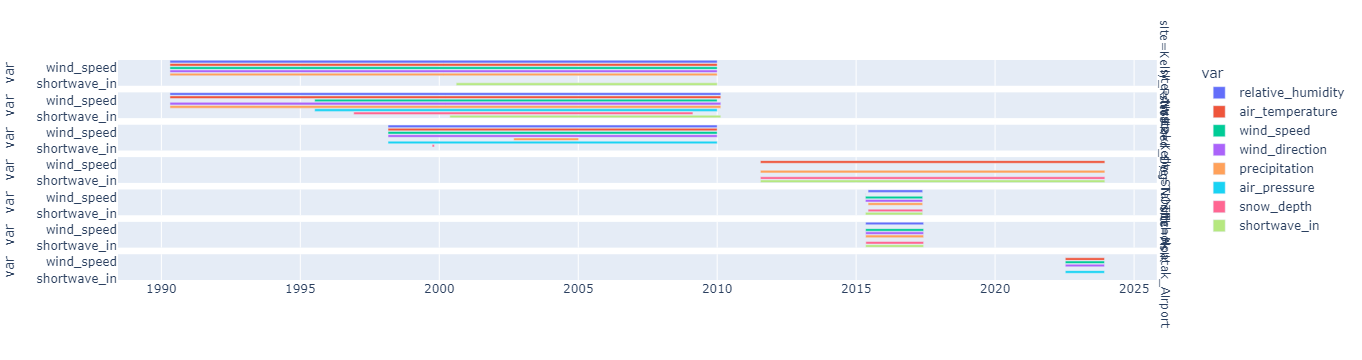

In [20]:
fig=px.timeline(sites_minmax.loc[sites_minmax['var'].isin(needed_vars)].sort_values(['min', 'site']),
                  x_start='min',
                  x_end='max',
                  y='var',
                  color='var',
                  facet_row='site',
                  height=1200)
fig.write_image('NorthernSiteCoverage.jpg')
fig.show()
 

In [16]:
help(px.timeline)

Help on function timeline in module plotly.express._chart_types:

timeline(data_frame=None, x_start=None, x_end=None, y=None, color=None, pattern_shape=None, facet_row=None, facet_col=None, facet_col_wrap=0, facet_row_spacing=None, facet_col_spacing=None, hover_name=None, hover_data=None, custom_data=None, text=None, animation_frame=None, animation_group=None, category_orders=None, labels=None, color_discrete_sequence=None, color_discrete_map=None, pattern_shape_sequence=None, pattern_shape_map=None, color_continuous_scale=None, range_color=None, color_continuous_midpoint=None, opacity=None, range_x=None, range_y=None, title=None, template=None, width=None, height=None) -> plotly.graph_objs._figure.Figure
        In a timeline plot, each row of `data_frame` is represented as a rectangular
        mark on an x axis of type `date`, spanning from `x_start` to `x_end`.
        
    Parameters
    ----------
    data_frame: DataFrame or array-like or dict
        This argument needs to be p